# Results
This notebook show the paper results

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import re

In [2]:
pd.options.display.max_rows = 500
FIGDIR = "../paper/figs/"

In [3]:
%matplotlib widget

In [4]:
#%matplotlib widget
%matplotlib inline

In [5]:
projects = pd.read_pickle('projects.zip')
releases = pd.read_pickle('releases.zip')

## Histogram of releases

In [6]:
np.arange(0,121)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120])

In [7]:
max = releases["commits"].max()

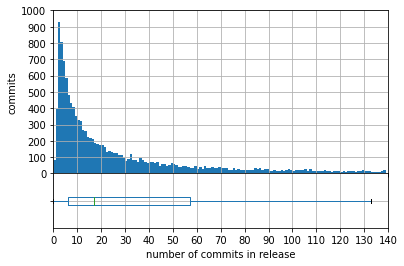

In [8]:
#fig, (ax1,ax2) = plt.subplots(2,1, sharex=True)

fig = plt.figure()
gs = fig.add_gridspec(4, 1, hspace=0, wspace=0)

ax_hist = fig.add_subplot(gs[0:3, :])
releases.hist(['commits'], ax=ax_hist, bins=np.arange(0,140))
ax_hist.set_xlim((0,140))
ax_hist.set_xticks(np.arange(0,141,10))
ax_hist.set_xticklabels([])
ax_hist.set_yticks(np.arange(0,1001,100))
ax_hist.set_ylabel("commits")

#ax_hist_out = fig.add_subplot(gs[0:3, -1])
#releases.hist(['commits'], ax=ax_hist_out, bins=np.arange(140,1000))
#ax_hist_out.set_xlim((140,max))
#ax_hist_out.set_yticks(np.arange(0,1001,100))
#ax_hist_out.set_yticklabels([])


ax_box = fig.add_subplot(gs[-1, :])
releases.boxplot(['commits'], ax=ax_box, vert=False, showfliers=False)
ax_box.set_xlim((0,140))
ax_box.set_xticks(np.arange(0,141,10))
ax_box.set_yticklabels([])
ax_box.set_xlabel("number of commits in release")

#ax_box_out = fig.add_subplot(gs[-1, -1])
#releases.boxplot(['commits'], ax=ax_box_out, vert=False, showfliers=True)
#ax_box_out.set_xlim((140,max))

ax_hist.set_title("")
fig.savefig(FIGDIR+'release_histogram')

## Number of releases

In [9]:
len(releases)

14126

In [10]:
releases.commits.median()

17.0

In [11]:
len(releases[releases.commits == 0])

85

In [12]:
releases.commits.max()

35800

In [13]:
releases[releases.commits > 20000]

,project,name,lang,head,time,commits,range_commits,range_tpos,range_fpos,range_fneg,time_commits,time_tpos,time_fpos,time_fneg,range_precision,range_recall,time_precision,time_recall
56,ansible/ansible,v2.5.0,python,2c2dd1a1b3eca6248979e04e70afff6dd3fcf366,2018-03-23 01:01:47+00:00,23385,23385,23385,0,0,26892,22705,4187,680,1.0,1.0,0.844303,0.970922
0,mpv-player/mpv,v0.1.0,c,d8922361d147bfdc91cd9a09160b025d832a6b72,2013-08-07 21:15:43+00:00,35800,35800,35800,0,0,35805,35800,5,0,1.0,1.0,0.999860,1.000000


In [14]:
releases.groupby('lang').mean()[['range_precision','range_recall','time_precision', 'time_recall']].round(3)*100

,range_precision,range_recall,time_precision,time_recall
lang,,,,
c,99.6,99.7,75.1,89.4
c#,97.3,98.5,75.3,91.1
c++,98.7,99.8,56.5,88.6
go,99.7,99.9,70.0,93.1
java,97.9,99.7,44.2,90.4
javascript,98.4,99.9,59.7,91.3
php,94.9,99.9,46.8,91.6
python,99.3,99.7,66.1,92.2
ruby,99.8,99.9,75.9,93.1


In [15]:
releases.groupby('lang').median()[['commits','range_commits','time_commits']].astype(int)

,commits,range_commits,time_commits
lang,,,
c,16,16,25
c#,24,26,43
c++,24,24,78
go,14,14,34
java,44,45,131
javascript,23,24,55
php,10,11,43
python,13,13,23
ruby,26,26,53


In [16]:
releases.mean()[['range_precision','range_recall','time_precision', 'time_recall']].round(3)*100

<ipython-input-16-23f9a3136a0b>:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  releases.mean()[['range_precision','range_recall','time_precision', 'time_recall']].round(3)*100


range_precision    98.4
range_recall       99.8
time_precision     62.2
time_recall        91.3
dtype: float64

In [17]:
releases.median()[['commits','range_commits','time_commits']].astype(int)

<ipython-input-17-e9f975d786a8>:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  releases.median()[['commits','range_commits','time_commits']].astype(int)


commits          17
range_commits    17
time_commits     42
dtype: int32

In [18]:
pd.DataFrame([
    releases[releases.commits <= releases.commits.median()][['range_precision','range_recall','time_precision', 'time_recall']].mean(),
    releases[releases.commits > releases.commits.median()][['range_precision','range_recall','time_precision', 'time_recall']].mean()
])

,range_precision,range_recall,time_precision,time_recall
0,0.978639,0.998566,0.530460,0.959287
1,0.988821,0.996786,0.716748,0.864826


# Precision and Recall Chart

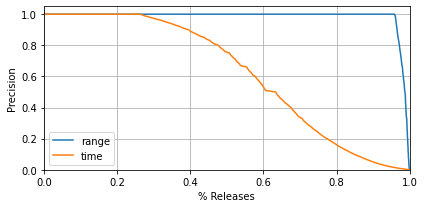

In [19]:
fig, ap = plt.subplots(1,1)
fig.set_size_inches(6,3)
ap.set_xlabel("% Releases")
ap.set_ylabel("Precision")

total = releases.shape[0]
increments = 0.01
y = []
x_precision_range = []
x_precision_time = []
for rng in np.arange(0, 1+increments, increments):
    range_precision_percent = releases[releases['range_precision'] >= rng].shape[0] / total 
    time_precision_percent = releases[releases['time_precision'] >= rng].shape[0] / total 
    x_precision_range.append(range_precision_percent)
    x_precision_time.append(time_precision_percent)
    y.append(rng)

y.append(1)
x_precision_range.append(0)
x_precision_time.append(0)

ap.plot(x_precision_range,y, label='range')
ap.plot(x_precision_time,y, label='time')
ap.legend(loc='lower left')
ap.set_xlim((0,1))
ap.set_ylim((0,1.05))
ap.xaxis.grid()
ap.yaxis.grid()

plt.tight_layout()
fig.savefig(FIGDIR+'release_precision')

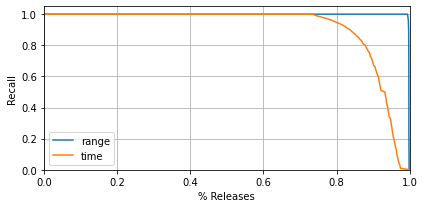

In [20]:
fig, ar = plt.subplots(1,1)
fig.set_size_inches(6,3)

ar.set_xlabel("% Releases")
ar.set_ylabel("Recall")

total = releases.shape[0]
increments = 0.01
y = []
x_recall_range = []
x_recall_time = []
for rng in np.arange(0, 1+increments, increments):
    range_recall_percent = releases[releases['range_recall'] >= rng].shape[0] / total 
    time_recall_percent = releases[releases['time_recall'] >= rng].shape[0] / total 
    x_recall_range.append(range_recall_percent)
    x_recall_time.append(time_recall_percent)
    
    y.append(rng)

y.append(1)
x_recall_range.append(0)
x_recall_time.append(0)

ar.plot(x_recall_range,y, label='range')
ar.plot(x_recall_time,y, label='time')
ar.legend(loc='lower left')
ar.set_xlim((0,1))
ar.set_ylim((0,1.05))
ar.xaxis.grid(which='both')
ar.yaxis.grid()

plt.tight_layout()
fig.savefig(FIGDIR+'release_recall')

In [21]:
releases.groupby(['lang','project']).mean().groupby('lang').mean()[['range_precision','range_recall','time_precision','time_recall']]

,range_precision,range_recall,time_precision,time_recall
lang,,,,
c,0.989246,0.991885,0.763420,0.928667
c#,0.972875,0.983214,0.693249,0.899657
c++,0.984118,0.999120,0.564558,0.876552
go,0.996905,0.999646,0.688852,0.926211
java,0.979764,0.996569,0.544477,0.920623
javascript,0.992503,0.999545,0.648513,0.907081
php,0.970885,0.998934,0.585552,0.920980
python,0.993728,0.998673,0.647853,0.921674
ruby,0.998150,0.999520,0.754143,0.927710


In [22]:
releases.groupby(['lang','project']).mean().mean()[['range_precision','range_recall','time_precision','time_recall']]

range_precision    0.986089
range_recall       0.996536
time_precision     0.655773
time_recall        0.911995
dtype: float64

In [23]:
releases.groupby(['project']).mean()[['range_precision','range_recall','time_precision','time_recall']].sort_values('range_recall')

,range_precision,range_recall,time_precision,time_recall
project,,,,
dotnet/efcore,0.861097,0.907146,0.363637,0.775465
taosdata/TDengine,0.899112,0.919301,0.454907,0.819983
jellyfin/jellyfin,0.928050,0.966667,0.368276,0.909911
Wox-launcher/Wox,0.973684,0.973684,0.741645,0.936863
cefsharp/CefSharp,0.980903,0.984641,0.541150,0.784172
alibaba/fastjson,0.967328,0.988636,0.584946,0.957588
apache/dubbo,0.985109,0.988803,0.439195,0.832963
ionic-team/ionic-framework,0.964719,0.990948,0.656842,0.885974
spring-projects/spring-framework,0.986764,0.992801,0.369032,0.927707


In [24]:
releases[releases.project == "sinatra/sinatra"].sort_values('range_recall')

,project,name,lang,head,time,commits,range_commits,range_tpos,range_fpos,range_fneg,time_commits,time_tpos,time_fpos,time_fneg,range_precision,range_recall,time_precision,time_recall
0,sinatra/sinatra,0.0.1,ruby,72be291da2bf7a5e2dacf8b9119a258d8db53c43,2007-09-08 23:51:24+00:00,1,1,1,0,0,1,1,0,0,1.0,1.0,1.000000,1.000000
68,sinatra/sinatra,1.3.5,ruby,f4364d44f709b248aaa8f0661e2f883ae73ade01,2013-02-25 10:09:26+00:00,0,0,0,0,0,0,0,0,0,1.0,1.0,1.000000,1.000000
67,sinatra/sinatra,v1.3.5,ruby,f4364d44f709b248aaa8f0661e2f883ae73ade01,2013-02-25 10:09:25+00:00,12,12,12,0,0,53,12,41,0,1.0,1.0,0.226415,1.000000
66,sinatra/sinatra,1.3.4,ruby,bc21cf1b983384b20f5572da0db529bf376ff1a3,2013-01-26 22:18:45+00:00,0,0,0,0,0,0,0,0,0,1.0,1.0,1.000000,1.000000
65,sinatra/sinatra,v1.3.4,ruby,bc21cf1b983384b20f5572da0db529bf376ff1a3,2013-01-26 22:18:44+00:00,27,27,27,0,0,144,27,117,0,1.0,1.0,0.187500,1.000000
64,sinatra/sinatra,v1.3.3,ruby,77346226dbb9492993accee2d042bfe6c9ae036c,2012-08-19 12:55:02+00:00,0,0,0,0,0,0,0,0,0,1.0,1.0,1.000000,1.000000
63,sinatra/sinatra,1.3.3,ruby,77346226dbb9492993accee2d042bfe6c9ae036c,2012-08-19 12:55:02+00:00,92,92,92,0,0,411,92,319,0,1.0,1.0,0.223844,1.000000
62,sinatra/sinatra,v1.3.2,ruby,e111243e813ede1f0f4c6918d9a8cc029e776fc3,2011-12-30 12:55:49+00:00,0,0,0,0,0,0,0,0,0,1.0,1.0,1.000000,1.000000
61,sinatra/sinatra,1.3.2,ruby,e111243e813ede1f0f4c6918d9a8cc029e776fc3,2011-12-30 12:55:49+00:00,91,91,91,0,0,136,91,45,0,1.0,1.0,0.669118,1.000000
60,sinatra/sinatra,1.3.1,ruby,ea57aaaa9671124279c3ae4690c58a1c5f05be78,2011-10-05 01:29:29+00:00,0,0,0,0,0,0,0,0,0,1.0,1.0,1.000000,1.000000
